In [1]:
import pandas as pd

In [2]:
df1 = pd.read_excel("CAPEX L12.xlsx")
df1.tail()

,Sr.No.,Accord Code,Company Name,GB+CWIP_1Y_CAGR,GB+CWIP_2Y_CAGR,GB+CWIP_3y_CAGR,FH_Market Capitalization,CONS_FH_1
68,69,111431,Vakrangee Ltd.,88.102329,43.794894,35.483163,13839.523200,C
69,70,219492,Valor Estate Ltd.,80.920241,279.123931,151.041759,2072.564823,C
70,71,100295,Vedanta Ltd.,36.021206,31.700104,73.778373,16882.267500,C
71,72,190005,Veedol Corporation Ltd.,53.495080,26.433821,34.490830,647.619300,C
72,73,104067,Zensar Technologies Ltd.,9.306165,68.009600,42.744927,781.376400,C


In [3]:
df1["GB+CWIP_CAPEX_SUM"] = df1["GB+CWIP_1Y_CAGR"] + df1["GB+CWIP_2Y_CAGR"] + df1["GB+CWIP_3y_CAGR"]

print("mean std for cagr")
mean_value = df1['GB+CWIP_CAPEX_SUM'].mean()
print(mean_value)
std_dev = df1['GB+CWIP_CAPEX_SUM'].std()
print(std_dev)

df1['ZSCORE_CAPEX'] = (df1['GB+CWIP_CAPEX_SUM']-mean_value) / std_dev

print("mean std for mcap")
mean_value = df1['FH_Market Capitalization'].mean()
print(mean_value)
std_dev = df1['FH_Market Capitalization'].std()
print(std_dev)

df1['ZSCORE_MCAP'] = (df1['FH_Market Capitalization']-mean_value) / std_dev

df1.tail()

mean std for cagr
247.3381220898517
226.97101484204637
mean std for mcap
3202.8507163379545
3838.3665028650394


,Sr.No.,Accord Code,Company Name,GB+CWIP_1Y_CAGR,GB+CWIP_2Y_CAGR,GB+CWIP_3y_CAGR,FH_Market Capitalization,CONS_FH_1,GB+CWIP_CAPEX_SUM,ZSCORE_CAPEX,ZSCORE_MCAP
68,69,111431,Vakrangee Ltd.,88.102329,43.794894,35.483163,13839.523200,C,167.380385,-0.352282,2.771146
69,70,219492,Valor Estate Ltd.,80.920241,279.123931,151.041759,2072.564823,C,511.085931,1.162033,-0.294471
70,71,100295,Vedanta Ltd.,36.021206,31.700104,73.778373,16882.267500,C,141.499683,-0.466308,3.563864
71,72,190005,Veedol Corporation Ltd.,53.495080,26.433821,34.490830,647.619300,C,114.419731,-0.585618,-0.665708
72,73,104067,Zensar Technologies Ltd.,9.306165,68.009600,42.744927,781.376400,C,120.060692,-0.560765,-0.630861


In [4]:
df2 = pd.read_excel("TRENDLYNE_230425.xlsx")
df2.head()

,Stock Name,NSE Code,BSE Code,Stock Code,ISIN,Industry Name,Current Price,Current Price.1,Market Capitalization,PE TTM Price to Earnings,...,Sector Return on Equity ROE,Industry Return on Equity ROE,RoA Annual %,Sector Return on Assets,Industry Return on Assets,Piotroski Score,sector_name,Industry Name.1,Latest financial result,Result Announced Date
0,20 Microns Ltd.,20MICRONS,533022.0,20MICRONS,INE144J01027,Coal & Mining,227.25,227.25,801.89,13.19,...,23.96,38.63,9.50,10.88,17.60,7.0,Metals & Mining,Coal & Mining,2024-12-31,2025-01-22
1,360 ONE Gold ETF,GOLD360,544375.0,GOLD360,INF579M01BB5,Others,95.45,95.45,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Others,Others,NaT,NaT
2,360 ONE Silver ETF,SILVER360,544389.0,SILVER360,INF579M01BC3,Others,99.20,99.20,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Others,Others,NaT,NaT
3,360 One Wam Ltd.,360ONE,542772.0,360ONE,INE466L01038,Capital Markets,1057.00,1057.00,41613.87,41.27,...,17.25,23.88,5.31,2.86,8.70,3.0,Banking and Finance,Capital Markets,2024-12-31,2025-04-23
4,3B BlackBio Dx Ltd.,NaN,532067.0,3BBLACKBIO,INE994E01018,Agrochemicals,1784.05,1784.05,1531.20,31.87,...,14.53,17.06,12.93,9.90,12.59,7.0,Chemicals & Petrochemicals,Agrochemicals,2024-12-31,2025-02-13


In [5]:
merged_df = pd.merge(df1, df2, how='inner', left_on='Company Name', right_on='Stock Name')
merged_df.head()

,Sr.No.,Accord Code,Company Name,GB+CWIP_1Y_CAGR,GB+CWIP_2Y_CAGR,GB+CWIP_3y_CAGR,FH_Market Capitalization,CONS_FH_1,GB+CWIP_CAPEX_SUM,ZSCORE_CAPEX,...,Sector Return on Equity ROE,Industry Return on Equity ROE,RoA Annual %,Sector Return on Assets,Industry Return on Assets,Piotroski Score,sector_name,Industry Name.1,Latest financial result,Result Announced Date
0,1,207654,A2Z Infra Engineering Ltd.,102.802006,153.864499,240.164261,837.466165,C,496.830765,1.099227,...,12.67,15.97,-0.83,5.35,5.27,4.0,Cement and Construction,Construction & Engineering,2024-12-31,2025-02-12
1,2,100488,Abbott India Ltd.,61.384663,33.725065,23.742599,3103.672758,S,118.852326,-0.566089,...,16.90,17.11,23.12,11.67,11.81,7.0,Pharmaceuticals & Biotechnology,Pharmaceuticals,2024-12-31,2025-02-05
2,3,209867,Adani Power Ltd.,48.036651,66.712071,84.304960,14889.673200,C,199.053683,-0.212734,...,19.18,19.85,22.56,7.09,6.72,8.0,Utilities,Electric Utilities,2024-12-31,2025-04-30
3,4,100187,AGI Greenpac Ltd.,66.616776,34.126913,34.503400,945.785880,C,135.247089,-0.493856,...,11.62,10.05,7.48,5.38,6.19,8.0,Commercial Services & Supplies,Containers & Packaging,2024-12-31,2025-01-20
4,5,100710,Akzo Nobel India Ltd.,82.896764,42.283018,29.611873,2994.232000,S,154.791655,-0.407746,...,20.72,27.05,14.69,10.69,16.96,7.0,Consumer Durables,Paints,2024-12-31,2025-02-07


In [6]:
df3 = pd.read_excel("C:/Users/meets/AVENTUS_FACTOR-MODEL/SIMPLE STRATEGY/L12 Valuation Data.xlsx")

final_merged_df = pd.merge(merged_df, df3, how='inner', left_on='Company Name', right_on='Company Name')
final_merged_df.head()

mean_value = final_merged_df['FR_Adjusted PE (x)'].mean()
std_dev = final_merged_df['FR_Adjusted PE (x)'].std()
final_merged_df['ZSCORE_PE'] = (final_merged_df['FR_Adjusted PE (x)']-mean_value) / std_dev

mean_value = final_merged_df['FR_EV/EBITDA(x)'].mean()
std_dev = final_merged_df['FR_EV/EBITDA(x)'].std()
final_merged_df['ZSCORE_EVEBITDA'] = (final_merged_df['FR_EV/EBITDA(x)']-mean_value) / std_dev

final_merged_df['ZSCORE_FINAL'] = (0.6 * final_merged_df['ZSCORE_CAPEX']) + (0.2 * final_merged_df['ZSCORE_MCAP']) + (0.10 * final_merged_df['ZSCORE_PE']) + (0.10 * final_merged_df['ZSCORE_EVEBITDA'])
# final_merged_df['ZSCORE_FINAL'] = (1 * final_merged_df['ZSCORE_CAPEX'])



final_merged_df = final_merged_df[final_merged_df["ZSCORE_FINAL"]>0]

# final_merged_df['PORTFOLIO_WEIGHTS'] = final_merged_df["ZSCORE_FINAL"]/final_merged_df["ZSCORE_FINAL"].sum()

column_list = final_merged_df['Stock Code'].tolist()
# print(column_list)

final_merged_df.head(5)

final_merged_df.to_csv("rahul_s1l12.csv")

In [7]:
df = pd.read_csv("C:/Users/meets/AVENTUS_FACTOR-MODEL/SIMPLE STRATEGY/mega_dateclose_final.csv")
columns_to_keep = ['Date'] + [col for col in column_list if col in df.columns]
filtered_with_date_df = df[columns_to_keep]


filtered_with_date_df['Date'] = pd.to_datetime(filtered_with_date_df['Date'])
start_date = pd.to_datetime("2012-03-31")
end_date = pd.to_datetime("2015-04-02")
filtered_df = filtered_with_date_df[(filtered_with_date_df['Date'] >= start_date) & (filtered_with_date_df['Date'] <= end_date)]
filtered_df.head()


df_cleaned = filtered_df.dropna(how='all', subset=filtered_df.columns.difference(['Date']))
rows_removed = len(filtered_df) - len(df_cleaned)
# print("ROWS REMOVED i.e. ALL VALUES MISSING EXCEPT DATE:", rows_removed)
df_cleaned.head()


df_fully_cleaned = df_cleaned.dropna(axis=1)
final_columns = df_fully_cleaned.columns.tolist()
if 'Date' in final_columns:
    final_columns.remove('Date')
print(final_columns)
df_fully_cleaned.head()


df_fully_cleaned['Date'] = pd.to_datetime(df_fully_cleaned['Date'])
df_fully_cleaned.set_index('Date', inplace=True)
pct_change_df = df_fully_cleaned.pct_change() 
pct_change_df = pct_change_df.iloc[1:] 
pct_change_df.head()
# pct_change_df.to_csv("gptwork.csv",index=False)



pct_change_df = pct_change_df.reset_index()  # This moves 'Date' from index to a regular column
pct_change_df.head()
# pct_change_df.to_csv("data1.csv",index=False)





# pct_change_df.to_csv("deletenow.csv",index=False)
# nan_counts = pct_change_df.isna().sum()
# print(nan_counts)
# columns_without_nans = df.columns[df.isna().sum() == 0].tolist()
# print(columns_without_nans)

# pct_change_df.dropna

['A2ZINFRA', 'ADANIPOWER', 'BAJAJCON', 'EDELWEISS', 'FORTIS', 'FEL', 'GODREJCP', 'JPPOWER', 'JYOTHYLAB', 'MANAPPURAM', 'GREENPOWER', 'PFS', 'MOTHERSON', 'SYMPHONY', 'TRITURBINE', 'VAKRANGEE', 'DBREALTY', 'VEDL']


C:\Users\meets\AppData\Local\Temp\ipykernel_13080\2449854086.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_with_date_df['Date'] = pd.to_datetime(filtered_with_date_df['Date'])
C:\Users\meets\AppData\Local\Temp\ipykernel_13080\2449854086.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fully_cleaned['Date'] = pd.to_datetime(df_fully_cleaned['Date'])


,Date,A2ZINFRA,ADANIPOWER,BAJAJCON,EDELWEISS,FORTIS,FEL,GODREJCP,JPPOWER,JYOTHYLAB,MANAPPURAM,GREENPOWER,PFS,MOTHERSON,SYMPHONY,TRITURBINE,VAKRANGEE,DBREALTY,VEDL
0,2012-04-03,0.078801,0.027697,0.017366,0.074653,-0.015802,0.095051,-0.010795,0.004831,0.006075,0.099369,0.030534,0.024615,-0.008902,0.065653,-0.037500,0.038328,-0.004499,0.030366
1,2012-04-04,-0.026995,0.028369,0.084513,-0.051696,0.027095,0.043999,-0.002425,0.003606,-0.009662,0.030129,-0.003704,-0.012012,0.002994,-0.010143,0.069264,0.043624,-0.010169,-0.019144
2,2012-04-09,-0.036720,-0.013103,-0.025720,-0.028961,-0.010747,-0.043578,0.010331,-0.027545,-0.021951,-0.041783,-0.022305,0.003040,-0.023881,0.003795,0.007085,-0.009646,-0.042237,-0.041346
3,2012-04-10,0.006777,0.014675,-0.005516,0.110526,-0.006420,0.009892,-0.011429,0.009852,0.004988,0.023256,0.007605,-0.006061,-0.006116,-0.017391,0.015075,-0.016234,0.012515,-0.017680
4,2012-04-11,-0.024401,-0.022727,-0.028922,-0.047393,-0.018390,-0.004749,-0.004868,-0.010976,0.022333,-0.029830,0.007547,-0.009146,0.006154,-0.015775,-0.033663,-0.013201,-0.005886,-0.021271


In [8]:
# PORTFOLIO WT CALCULATION

final_df = final_merged_df[final_merged_df['Stock Code'].isin([name.upper() for name in final_columns])]
final_df.head()

final_df['PORTFOLIO_WEIGHTS'] = final_df["ZSCORE_FINAL"]/final_df["ZSCORE_FINAL"].sum()
final_df.head()

final_df = final_df[["Stock Code","PORTFOLIO_WEIGHTS"]]
final_df.head(20)
# final_df.to_csv("data2.csv",index=False)

C:\Users\meets\AppData\Local\Temp\ipykernel_13080\3447757058.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df['PORTFOLIO_WEIGHTS'] = final_df["ZSCORE_FINAL"]/final_df["ZSCORE_FINAL"].sum()


,Stock Code,PORTFOLIO_WEIGHTS
0,A2ZINFRA,0.054235
2,ADANIPOWER,0.047098
8,BAJAJCON,0.057138
20,EDELWEISS,0.006648
21,FORTIS,0.045715
23,FEL,0.024351
25,GODREJCP,0.073347
38,JPPOWER,0.032726
40,JYOTHYLAB,0.036713
44,MANAPPURAM,0.005631


In [9]:
#DIRECT COPYPASTE - NO EDIT


# Align columns: ensure weights match the columns in the return dataframe
returns_df = pct_change_df.copy()
weights_df = final_df.set_index("Stock Code")["PORTFOLIO_WEIGHTS"]

# Ensure only common stocks are used
common_stocks = returns_df.columns.intersection(weights_df.index)
returns_matrix = returns_df[common_stocks].copy()
weights_vector = weights_df.loc[common_stocks]

# Perform matrix multiplication (dot product) for each date
returns_df["Portfolio Return"] = returns_matrix.dot(weights_vector)

# Show a few results
final_portfolio = returns_df[["Date", "Portfolio Return"]]
final_portfolio.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 743 entries, 0 to 742
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Date              743 non-null    datetime64[ns]
 1   Portfolio Return  743 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 11.7 KB


In [10]:
#DIRECT COPYPASTE - NO EDIT

df2 = pd.read_csv("C:/Users/meets/AVENTUS_FACTOR-MODEL/SIMPLE STRATEGY/BENCHMARK/BSE500_PCTRETURNS_09-25.csv")
df2['BDP_Date'] = pd.to_datetime(df2['BDP_Date'])

final_portfolio_benchmark = pd.merge(final_portfolio, df2, how='inner', left_on='Date', right_on='BDP_Date')
final_portfolio_benchmark = final_portfolio_benchmark.drop('BDP_Date', axis=1)
final_portfolio_benchmark.set_index('Date', inplace=True)
final_portfolio_benchmark = final_portfolio_benchmark.rename(columns={'Portfolio Return':'Strategy'})
final_portfolio_benchmark.head()
final_portfolio_benchmark.to_csv("s1l12b.csv")
# final_portfolio_benchmark.to_csv("final_portfolio_benchmarkQ.csv")

                           Benchmark    Strategy
-------------------------  -----------  ----------
Start Period               2012-04-03   2012-04-03
End Period                 2015-04-01   2015-04-01
Risk-Free Rate             0.0%         0.0%
Time in Market             100.0%       100.0%

Cumulative Return          64.32%       118.56%
CAGR﹪                     12.13%       19.75%

Sharpe                     1.25         1.25
Prob. Sharpe Ratio         98.3%        98.48%
Smart Sharpe               1.08         1.08
Sortino                    1.82         1.91
Smart Sortino              1.58         1.66
Sortino/√2                 1.29         1.35
Smart Sortino/√2           1.12         1.18
Omega                      1.23         1.23

Max Drawdown               -16.59%      -33.16%
Longest DD Days            319          493
Volatility (ann.)          14.36%       23.51%
R^2                        0.41         0.41
Information Ratio          0.04         0.04
Calmar            

None

,Start,Valley,End,Days,Max Drawdown,99% Max Drawdown
1,2013-01-08,2013-07-31,2014-05-15,493,-33.159239,-32.086993
2,2014-09-10,2014-10-16,2014-11-12,64,-13.355717,-13.313125
3,2012-04-09,2012-05-14,2012-09-20,165,-10.430099,-9.851003
4,2014-12-04,2014-12-17,2014-12-30,27,-9.802716,-9.548237
5,2014-07-08,2014-08-13,2014-09-05,60,-9.577815,-7.917738


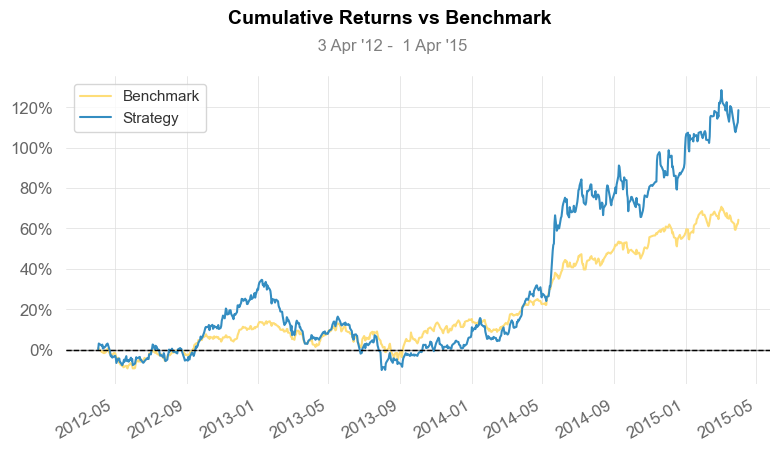

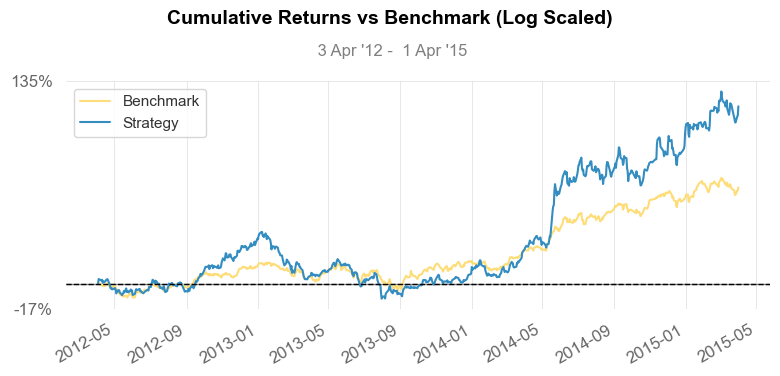

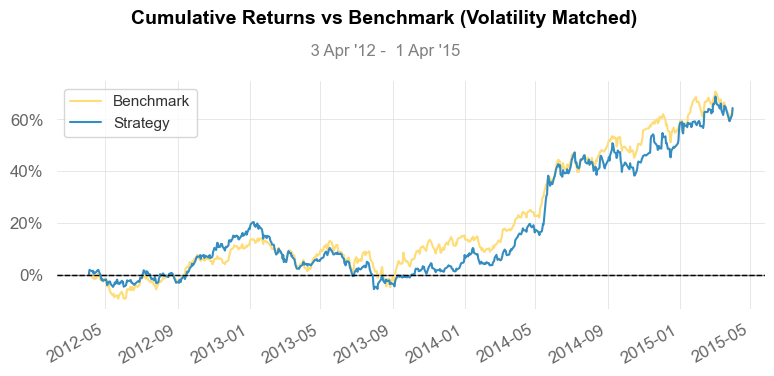

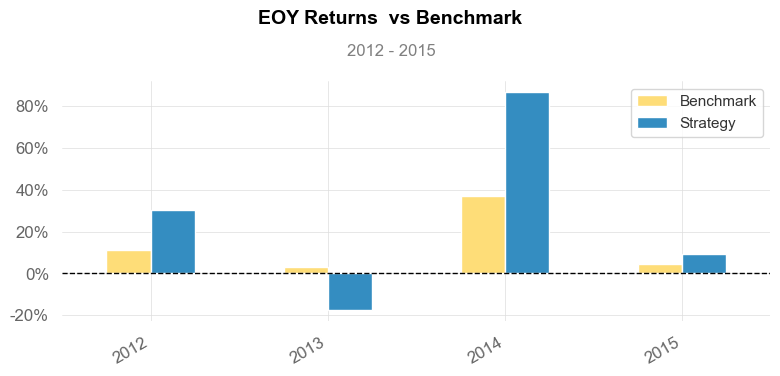

OptionError: No such keys(s): 'mode.use_inf_as_null'

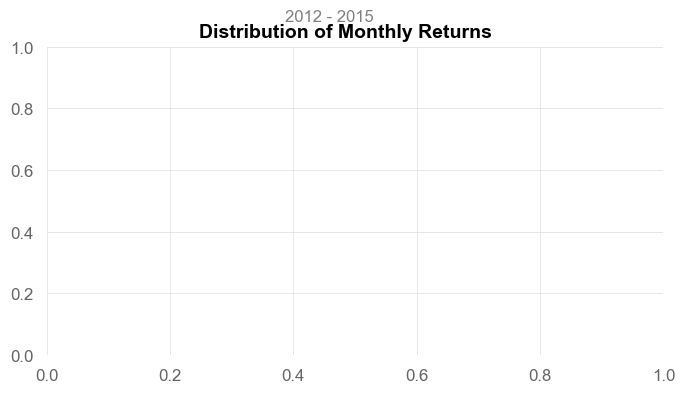

In [11]:
import quantstats as qs

final_portfolio_benchmark.index = pd.to_datetime(final_portfolio_benchmark.index)

qs.reports.full(final_portfolio_benchmark['Strategy'],benchmark = final_portfolio_benchmark['BDP_Close'],mode="full")